In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

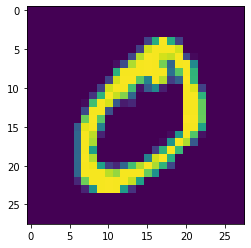

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.2531 - accuracy: 0.9499 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0715 - accuracy: 0.9782 - val_loss: 0.0870 - val_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.1067 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.1191 - val_accuracy: 0.9728


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11914915591478348, 0.9728000164031982]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 100ms/step
[[1.5418460e-11 1.9603810e-18 4.8458876e-10 1.1243964e-06 6.9107991e-15
  1.8648049e-15 1.4833840e-19 9.9999893e-01 8.8509294e-10 9.8242801e-09]
 [2.3842947e-08 4.8980371e-07 9.9997854e-01 2.0961506e-05 1.1841537e-12
  9.3639821e-16 4.1209887e-08 2.6646290e-13 1.8436535e-11 2.3019596e-15]
 [2.5684704e-08 9.9961203e-01 7.6358619e-06 9.2723534e-10 3.5842572e-04
  1.7127735e-07 5.8126762e-08 3.1961613e-07 2.1267058e-05 4.4196371e-09]
 [9.9999988e-01 7.6736692e-17 1.7381243e-08 7.3655490e-17 1.5527530e-14
  1.1569802e-14 9.2881230e-08 4.9202009e-15 1.7873938e-12 9.7002614e-13]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")